# Interpret First order ODE as a Filter 

In [53]:
import requests as req
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic not file found - downloading it')
    url = "https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py"
    res = req.get(url)
    file = open('basic_material.py', 'w')
    file.write(res.text)
    file.close()

from sympy.abc import w, a, t, x, s, X, g, G, v, A, B,t,f
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, arg, atan2, re, cos, exp_polar, pi
from sympy import symbols,Function,Eq,dsolve 

Running Python: 3.8.17
Running Sympy: 1.12rc1
Basic file found


In [64]:
# define some variables we can use
v, g, X = symbols('v g X', cls = Function)
t = Symbol('t', positive=True)
w_i = Symbol('wi', positive=True)
w_0 = Symbol('w0', positive=True)

w_low = 0.1
w_high = 10

## Define the ODE

Consider a first order differerntial equation system driven by a sine input. 

System dynamics are determined by parameter $w>0$ while the input frequency is determined by $a>0$
$$
\frac{dv(t)}{dt} + w_0 \cdot v(t) = w_0 \sin(w_i t)
$$

**Question to address:** how does the size of $w_i > 0$ compared to $w_0 > 0$ impact the output $v(t)$? 

In [67]:
eom  = Eq(v(t).diff(t) + w_0*v(t), w_0*sym.sin(w_i*t))

In [69]:
# solve the ODE
Vout = dsolve(eom,v(t), ics={v(0): 0})
Vout

Eq(v(t), w0**2*sin(t*wi)/(w0**2 + wi**2) - w0*wi*cos(t*wi)/(w0**2 + wi**2) + w0*wi*exp(-t*w0)/(w0**2 + wi**2))

Consider the two cases of $\frac{w_i}{w_0} \ll 1$ and $\frac{w_i}{w_0} \gg 1$ 

In [71]:
wi_low = 0.1
wi_high = 10
V_low_wi = Vout.subs(w_0,1).subs(w_i,wi_low)
V_high_wi = Vout.subs(w_0,1).subs(w_i,wi_high)

## Case 1: input frequency $a$ much lower than that of the systems, so $a/w \ll 1$

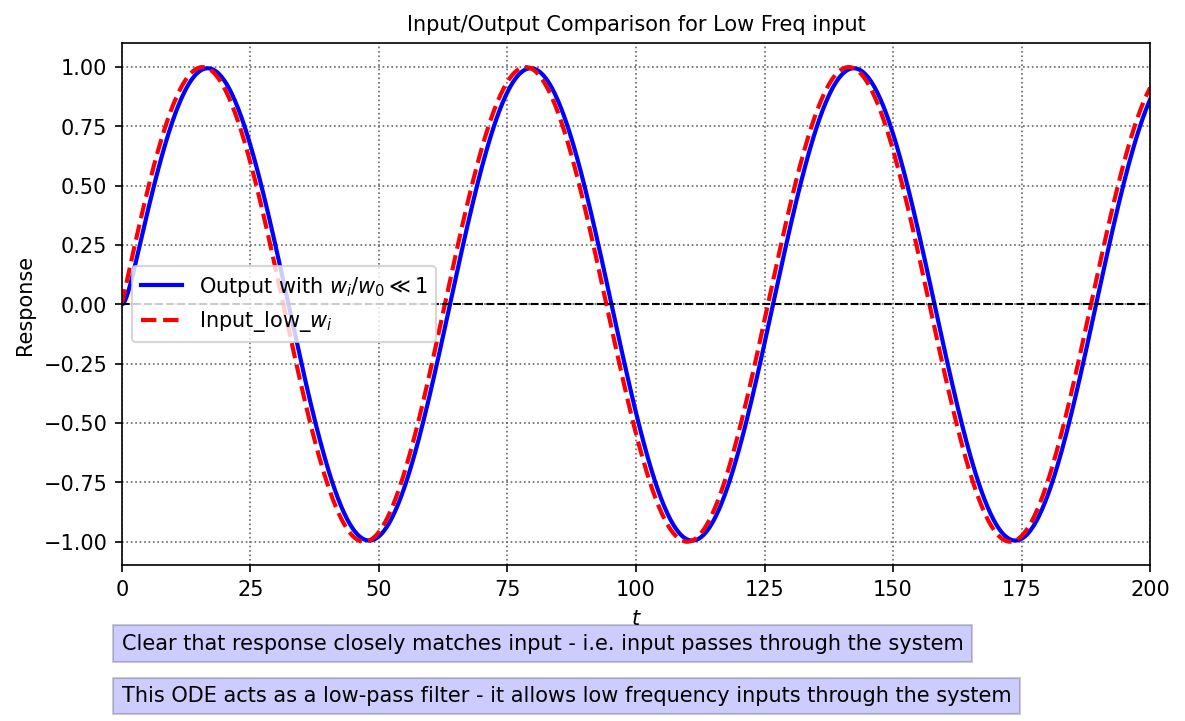

In [73]:
input_low_wi = sym.sin(wi_low*t)
lam_p1 = lambdify(t, V_low_wi.rhs, modules=['numpy'])
lam_p3 = lambdify(t, input_low_wi, modules=['numpy'])

tlim = 200
tt = np.linspace(0, tlim, 1000)

fig, ax = plt.subplots(figsize=(8, 5),dpi=150)
plt.plot(tt, lam_p1(tt),'b',label='Output with $w_i/w_0 \ll 1$')
plt.plot(tt, lam_p3(tt),'r--',label='Input_low_$w_i$')

plt.legend()
plt.xlim(0,tlim)
plt.xlabel('$t$')
plt.ylabel('Response')
plt.title('Input/Output Comparison for Low Freq input')
nicegrid()

text1 = "Clear that response closely matches input - i.e. input passes through the system"
text2 = "This ODE acts as a low-pass filter - it allows low frequency inputs through the system"
plt.text(0., -0.15, text1, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='blue', alpha=0.2))
plt.text(0, -0.25, text2, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='blue', alpha=0.2))
plt.show()


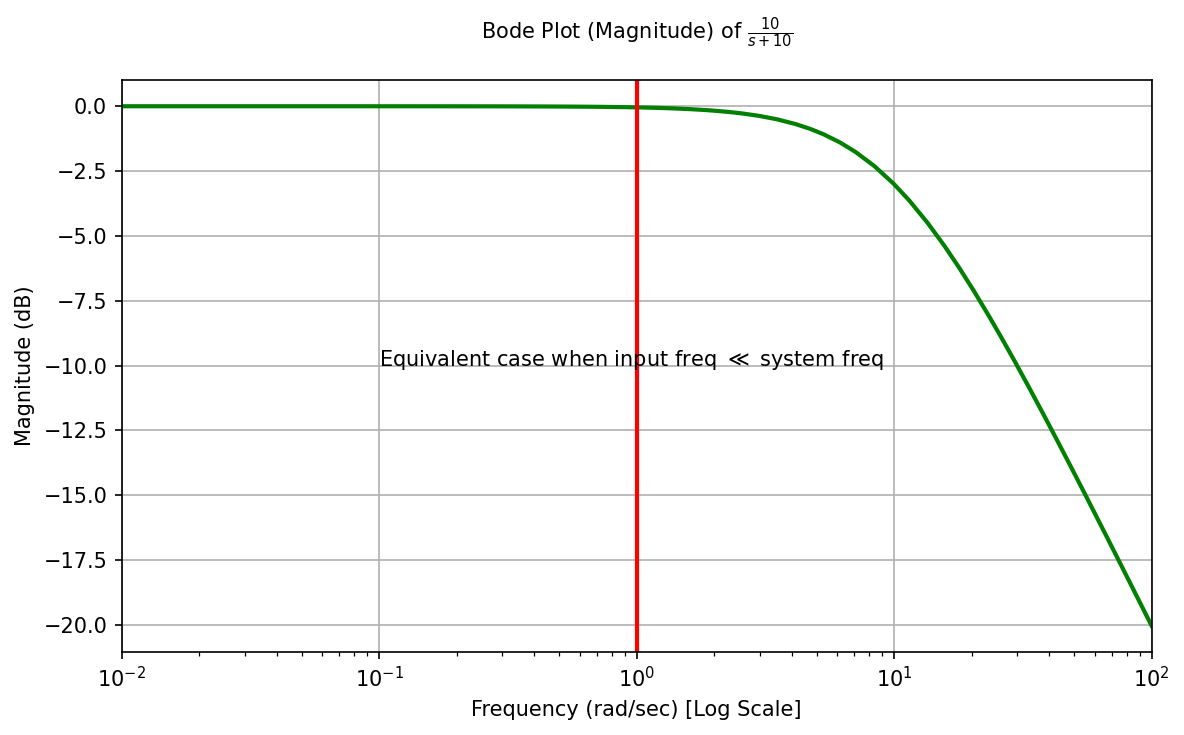

In [76]:
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import bode_magnitude_plot

tf_high = TransferFunction(w_high, 1*s + w_high, s)
bode_magnitude_plot(tf_high, initial_exp=-2, final_exp=2, show=False,color='g')  
plt.axvline(x=1,color='r')
plt.text(.1,-10,"Equivalent case when input freq $\ll$ system freq")
plt.show()

## Case 2: input frequency $a$ much higher than that of the systems, so $a/w \gg 1$

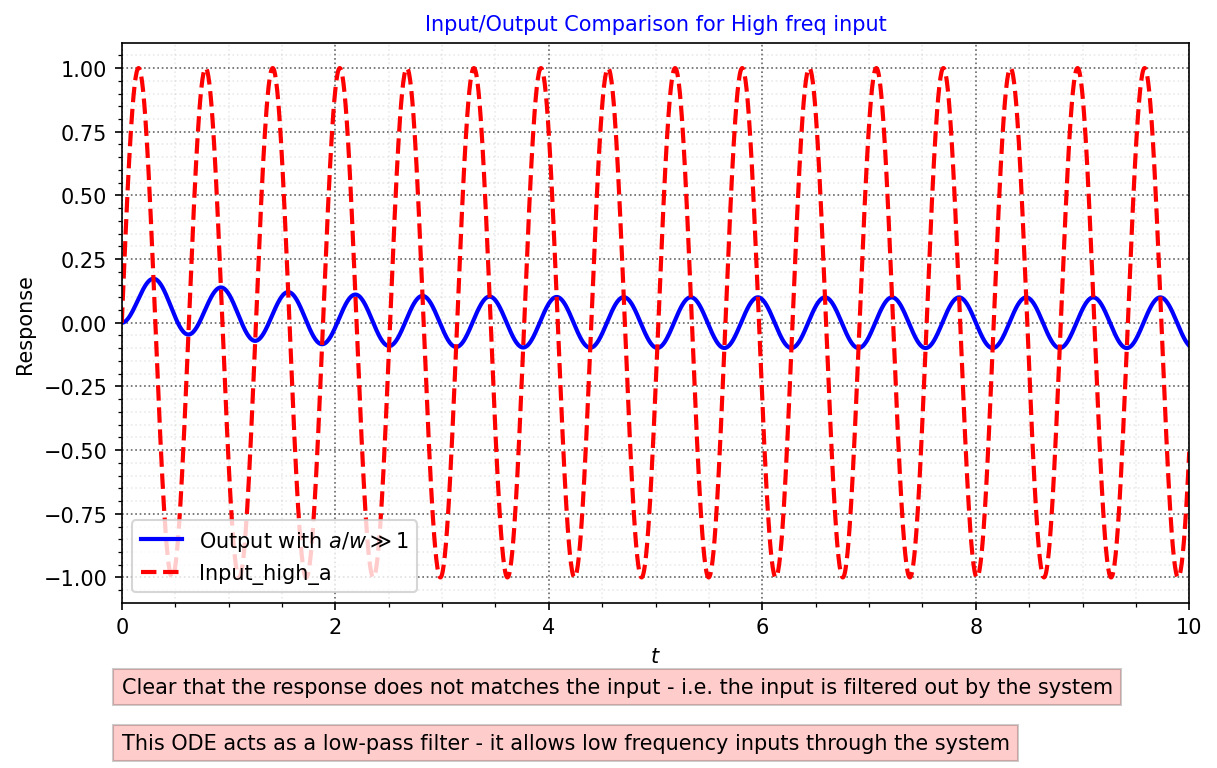

In [13]:
input_high_a = sym.sin(ahigh*t)

lam_p2 = lambdify(t, V_high_a.rhs, modules=['numpy'])
lam_p4 = lambdify(t, input_high_a, modules=['numpy'])

tlim = 10
tt = np.linspace(0, tlim, 2000)

fig, ax = plt.subplots(figsize=(8, 5),dpi=150)
plt.plot(tt, lam_p2(tt),'b',label='Output with $a/w \gg 1$')
plt.plot(tt, lam_p4(tt),'r--',label='Input_high_a')

plt.legend()
plt.xlim(0,tlim)
plt.xlabel('$t$')
plt.ylabel('Response')
plt.title('Input/Output Comparison for High freq input')
nicegrid()

text1 = "Clear that the response does not matches the input - i.e. the input is filtered out by the system"
text2 = "This ODE acts as a low-pass filter - it allows low frequency inputs through the system"
plt.text(0, -0.15, text1, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='red', alpha=0.2))
plt.text(0, -0.25, text2, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='red', alpha=0.2))
plt.show()

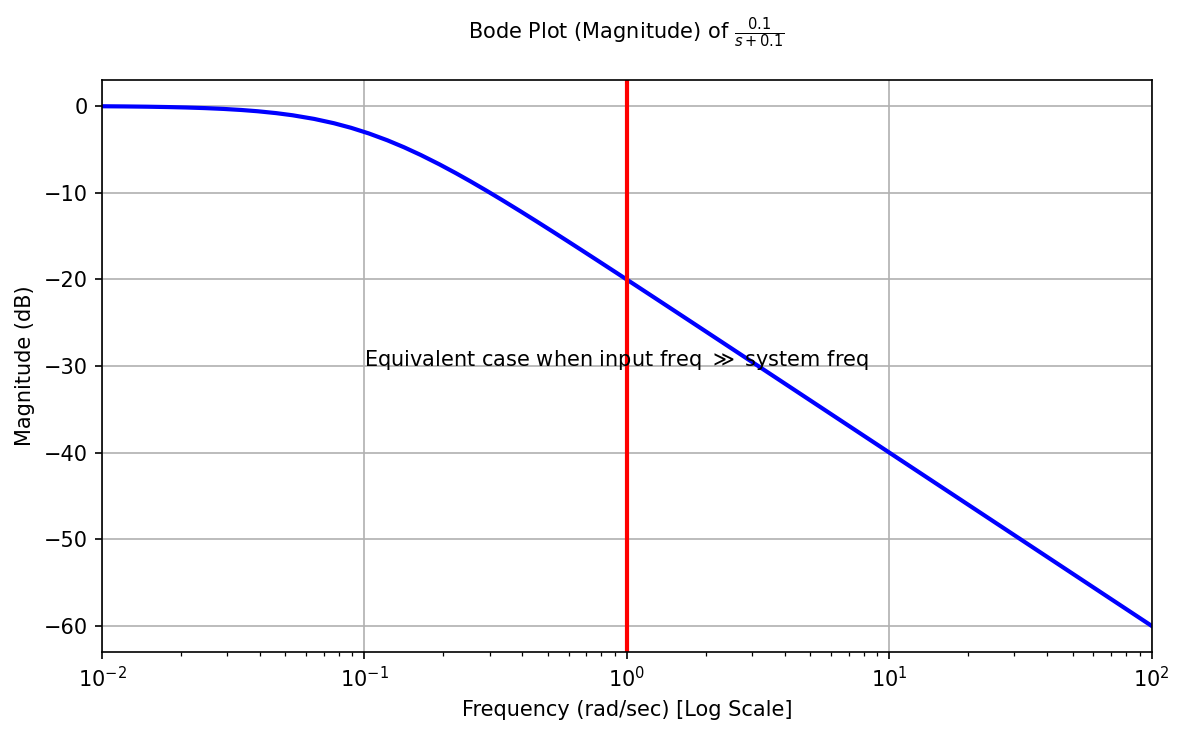

In [79]:
tf_low = TransferFunction(w_low, 1*s + w_low, s)
bode_magnitude_plot(tf_low, initial_exp=-2, final_exp=2, show=False)  
plt.axvline(x=1,color='r')
plt.text(.1,-30,"Equivalent case when input freq $\gg$ system freq")
plt.show()